In [ ]:
import happi
import os
from base64 import b64encode
from IPython.display import HTML
import asyncio
import subprocess
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
%cd C:/Users/fucce/Desktop/CPD/1proceso/Smilei-benchmarks-main

C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main


In [ ]:
class CFG:
    TIMESTEPS = 2250
    FLOPS = lambda p: (14574*p+26411)*CFG.TIMESTEPS
    ROOT_PATH = Path.cwd()
    other_quantities = [ f"number_of_{q}" for q in ["cells", "particles", "frozen_particles"] ]
    timers = [ f"timer_{x}" for x in [ "global", "particles", "maxwell", 
                                      "densities", "collisions", "movWindow", "loadBal",
                                      "syncPart", "syncField", "syncDens", "diags", "total"] ]
    dirs = [ Path(f"plasma_collision_{idx}") for idx in np.arange(1,5) ]
    procs =[1]+ [ 1<<i for i in np.arange(2,6) ] 
    subdirs = [ Path(f"{idx}_procs") for idx in procs ]

In [ ]:
def general_plots(simulation, path):
    vars = CFG.other_quantities + CFG.timers
    for var in vars:
        diag = S.Performances(raw=var)
        timestep = diag.getTimesteps()[-1]
        diag.plot(timestep=timestep, saveAs=f"{path/var}.png")

In [ ]:
def strong_scaling_plots(path):
    cores = CFG.procs
    execution_times = []
    execution_times1 = []
    speeds = []
    speeds1 = []
    i=0
    for subd in CFG.subdirs:
        S = happi.Open(str(path/subd))
        diag = S.Performances(raw="number_of_particles")
        p = diag.getData(0)[0].sum()
        diag = S.Performances(raw="timer_global")
        timestep = diag.getTimesteps()[-1]
        execution_time = diag.getData(timestep)[0][0]
        execution_times += [execution_time]
        execution_times1 += [(execution_times[0]/(execution_time))/cores[i]]
        FLOPS = CFG.FLOPS(p)
        speeds += [ FLOPS / execution_time ]
        speeds1 += [speeds[0]/(FLOPS / execution_time)]
        i+=1

        print(execution_times1)
    y=[0.4*i for i in range(32)]
    plt.plot(cores, execution_times1)
    plt.xlabel('Cores')
    plt.ylabel('Execution time (s)')
    plt.savefig(path / "ef-cores_vs_exectime.png",dpi=2000)
    plt.show()
    plt.plot(cores, speeds)
    plt.xlabel('Cores')
    plt.ylabel('Speed')
    plt.savefig(path / "ss-cores_vs_speed.png")
    plt.show()

In [ ]:
#strong_scaling_plots(CFG.dirs[0])

In [ ]:
def weak_scaling_plots():
    cores = CFG.procs
    execution_times = []
    speeds = []
    path = Path.cwd()
    for idx in range(4):
        S = happi.Open(str(path/CFG.dirs[idx]/CFG.subdirs[idx+1]))
        diag = S.Performances(raw="number_of_particles")
        p = diag.getData(0)[0].sum()
        diag = S.Performances(raw="timer_global")
        timestep = diag.getTimesteps()[-1]
        execution_time = diag.getData(timestep)[0][0]
        execution_times += [execution_time]
        FLOPS = CFG.FLOPS(p)
        speeds += [ FLOPS / execution_time ]
    plt.plot(cores, execution_times)
    plt.xlabel('Cores')
    plt.ylabel('Execution time (s)')
    plt.savefig(path / "ws-cores_vs_exectime.png",dpi=2200)
    plt.show()
    plt.plot(cores, speeds)
    plt.xlabel('Cores')
    plt.ylabel('Speed')
    plt.savefig(path / "ws-cores_vs_speed.png",dpi=2200)
    plt.show()

In [ ]:
#weak_scaling_plots()

Loaded simulation 'plasma_collision_1\1_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
[1.0]
Loaded simulation 'plasma_collision_1\4_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
[1.0, 0.5735565479370845]
Loaded simulation 'plasma_collision_1\8_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Sc

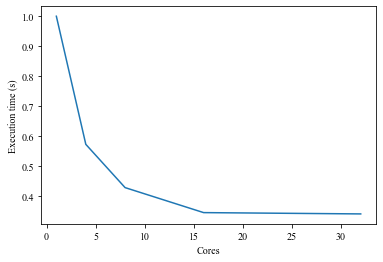

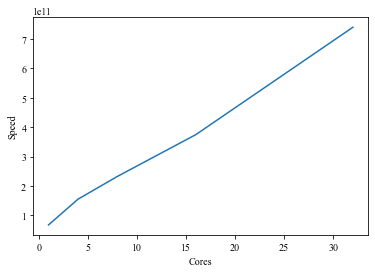

Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_1\1_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_1\4_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_1\8_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning f

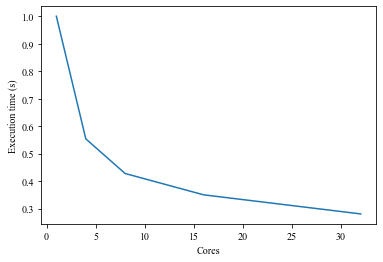

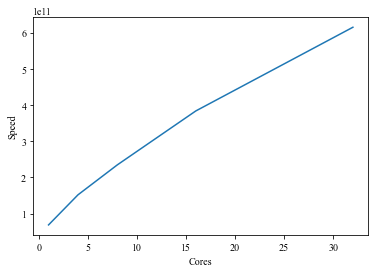

Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_2\1_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_2\4_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_2\8_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning f

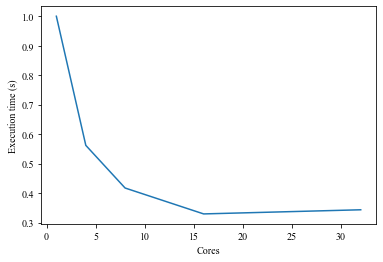

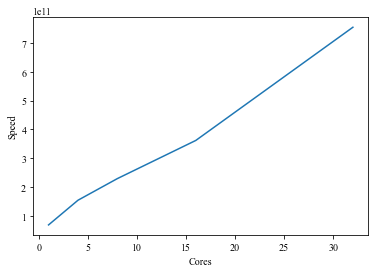

Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_3\1_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_3\4_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_3\8_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning f

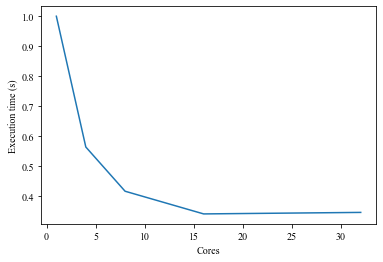

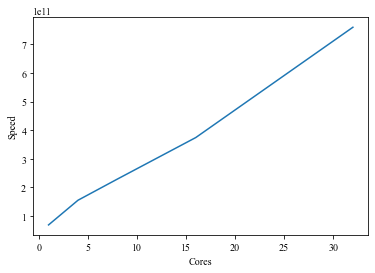

Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_4\1_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_4\4_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation 'C:\Users\fucce\Desktop\CPD\1proceso\Smilei-benchmarks-main\plasma_collision_4\8_procs'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning f

In [ ]:
# %%capture
#weak_scaling_plots()

for d in CFG.dirs:
    strong_scaling_plots(d)
    for subd in CFG.subdirs:
        cur_path = CFG.ROOT_PATH / d / subd
        S = happi.Open(str(cur_path))
        #general_plots(S, cur_path)


In [ ]:
%%capture
diag = S.Performances(raw="number_of_cells")
diag.animate(cmap="smilei", movie=f"number_of_cells.mp4")

In [ ]:
#@title Number of cells
subprocess.run(f"ffmpeg -i {'number_of_cells.mp4'} -vcodec libx264 {'compressed_number_of_cells.mp4'}".split(), capture_output=True)
mp4 = open('compressed_number_of_cells.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="number_of_particles")
diag.animate(cmap="smilei", movie=f"number_of_particles.mp4")

In [ ]:
#@title Number of particles
subprocess.run(f"ffmpeg -i {'number_of_particles.mp4'} -vcodec libx264 {'compressed_number_of_particles.mp4'}".split(), capture_output=True)
mp4 = open('compressed_number_of_particles.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_particles")
diag.animate(cmap="smilei", movie=f"timer_particles.mp4")

In [ ]:
#@title Timer particles
subprocess.run(f"ffmpeg -i {'timer_particles.mp4'} -vcodec libx264 {'compressed_timer_particles.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_particles.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_maxwell")
diag.animate(cmap="smilei", movie=f"timer_maxwell.mp4")

In [ ]:
#@title Timer Maxwell
subprocess.run(f"ffmpeg -i {'timer_maxwell.mp4'} -vcodec libx264 {'compressed_timer_maxwell.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_maxwell.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_densities")
diag.animate(cmap="smilei", movie=f"timer_densities.mp4")

In [ ]:
#@title Timer densities
subprocess.run(f"ffmpeg -i {'timer_densities.mp4'} -vcodec libx264 {'compressed_timer_densities.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_densities.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_collisions")
diag.animate(cmap="smilei", movie=f"timer_collisions.mp4")

In [ ]:
#@title Timer collisions
subprocess.run(f"ffmpeg -i {'timer_collisions.mp4'} -vcodec libx264 {'compressed_timer_collisions.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_collisions.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_movWindow")
diag.animate(cmap="smilei", movie=f"timer_mov_window.mp4")

In [ ]:
#@title Timer moving window
subprocess.run(f"ffmpeg -i {'timer_mov_window.mp4'} -vcodec libx264 {'compressed_timer_mov_window.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_mov_window.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_loadBal")
diag.animate(cmap="smilei", movie=f"timer_load_balancing.mp4")

In [ ]:
#@title Timer load balancing
subprocess.run(f"ffmpeg -i {'timer_load_balancing.mp4'} -vcodec libx264 {'compressed_timer_load_balacing.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_load_balacing.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_syncPart")
diag.animate(cmap="smilei", movie=f"timer_synch_particles.mp4")

In [ ]:
#@title Timer synch particles
subprocess.run(f"ffmpeg -i {'timer_synch_particles.mp4'} -vcodec libx264 {'compressed_timer_synch_particles.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_synch_particles.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_syncField")
diag.animate(cmap="smilei", movie=f"timer_synch_field.mp4")

In [ ]:
#@title Timer synch field
subprocess.run(f"ffmpeg -i {'timer_synch_field.mp4'} -vcodec libx264 {'compressed_timer_synch_field.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_synch_field.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_syncDens")
diag.animate(cmap="smilei", movie=f"timer_synch_dens.mp4")

In [ ]:
#@title Timer synch densities
subprocess.run(f"ffmpeg -i {'timer_synch_dens.mp4'} -vcodec libx264 {'compressed_timer_synch_dens.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_synch_dens.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_diags")
diag.animate(cmap="smilei", movie=f"timer_diags.mp4")

In [ ]:
#@title Timer diags
subprocess.run(f"ffmpeg -i {'timer_diags.mp4'} -vcodec libx264 {'compressed_timer_diags.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_diags.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%%capture
diag = S.Performances(raw="timer_total")
diag.animate(cmap="smilei", movie=f"timer_total.mp4")

In [ ]:
#@title Timer total
subprocess.run(f"ffmpeg -i {'timer_total.mp4'} -vcodec libx264 {'compressed_timer_total.mp4'}".split(), capture_output=True)
mp4 = open('compressed_timer_total.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
diag = S.Performances(raw="number_of_particles")

In [ ]:
diag.getTimesteps()

In [ ]:
diag.plot(2220)

In [ ]:
diag.getData(2220)